In [20]:
# importações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_exames = pd.read_csv('./datasets/diabetes.csv')
df_exames.info(), df_exames.head(11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


(None,
     id_paciente genero  idade  peso  altura  resultado
 0             1      M     46    83     165         98
 1             2      F     23    83     164         82
 2             3      M     39    71     154         93
 3             4      F     26   103     165         95
 4             5      M     27    55     176        100
 5             6      M     64    93     190        117
 6             7      F     21    70     182         90
 7             8      F     60   101     179         84
 8             9      F     63    83     189         92
 9            10      F     65    78     175        121
 10           11      M     60   120     158         98)

In [22]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [23]:
# remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [24]:
df_exames

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
...,...,...,...,...,...
95,F,52,96,183,89
96,F,68,108,169,105
97,M,21,95,154,125
98,M,41,109,173,128


In [25]:
# converter uma variavel categorica (genero) em numerica, usando ONE-HOT-ENCODING

df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')
df_exames

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
...,...,...,...,...,...,...
95,52,96,183,89,1,0
96,68,108,169,105,1,0
97,21,95,154,125,0,1
98,41,109,173,128,0,1


<Axes: >

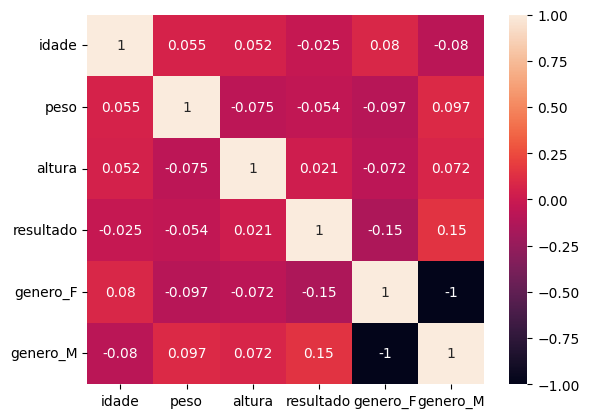

In [30]:
# apresentar mapa de calor com correlação entre as variaveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1 ,annot=True)